<a href="https://colab.research.google.com/github/yapjayann/web-network-labs/blob/main/W%26N_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install networkx matplotlib

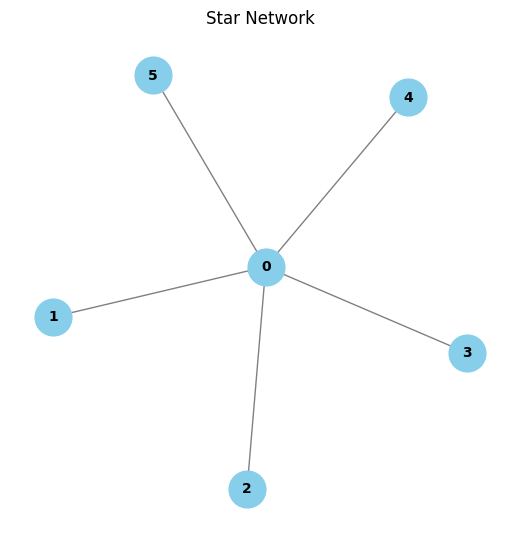

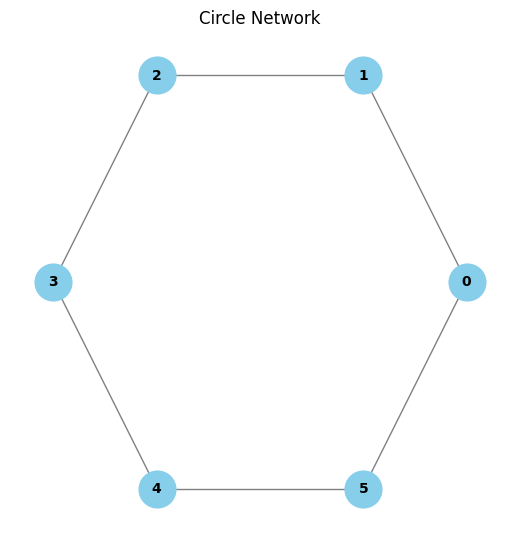

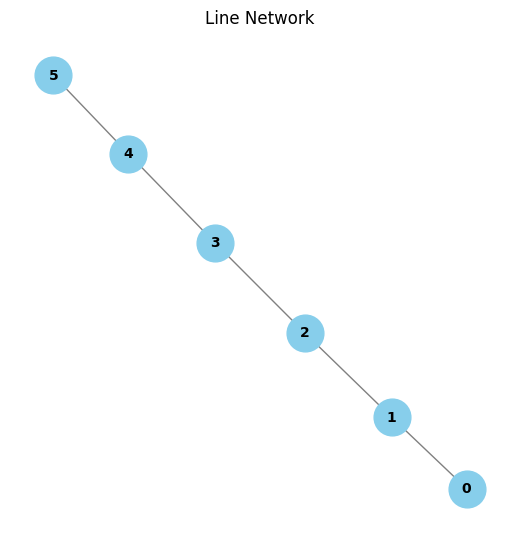

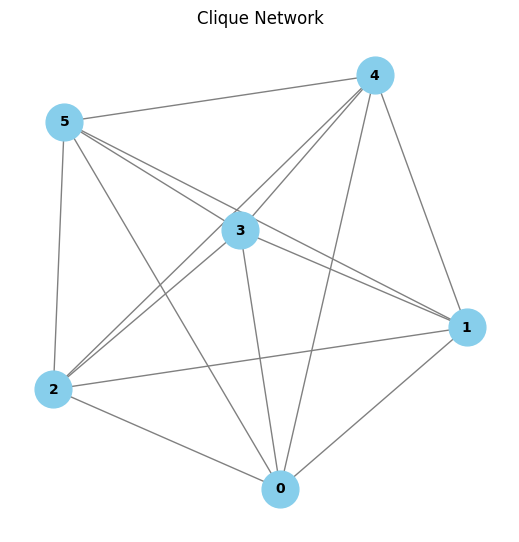

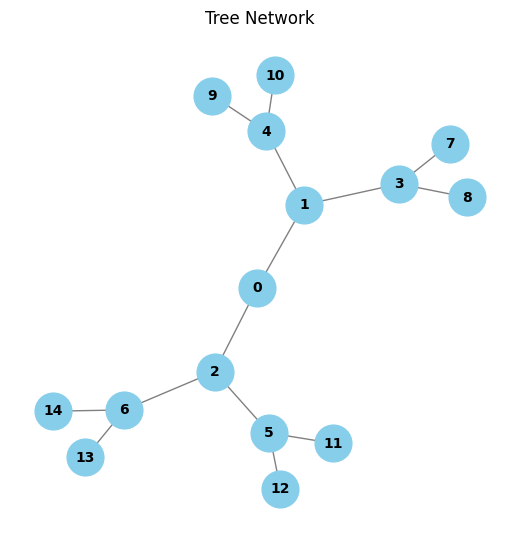

     Network Type  Average Degree Centrality  Clustering Coefficient  \
0    Star Network                   0.333333                     0.0   
1  Circle Network                   0.400000                     0.0   
2    Line Network                   0.333333                     0.0   
3  Clique Network                   1.000000                     1.0   
4    Tree Network                   0.133333                     0.0   

   Average Path Length   Density  
0             1.666667  0.333333  
1             1.800000  0.400000  
2             2.333333  0.333333  
3             1.000000  1.000000  
4             3.504762  0.133333  


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate and print network metrics
def calculate_metrics(G, name):
  degree_centrality = nx.degree_centrality(G)
  clustering_coefficient = nx.average_clustering(G)
  try:
    average_path_length = nx.average_shortest_path_length(G)
  except nx.NetworkXError:
    average_path_length = "Not Applicable" # For non-connected networks
  density = nx.density(G)

  metrics = {
    "Network Type": name,
    "Average Degree Centrality": sum(degree_centrality.values()) / len(degree_centrality),
    "Clustering Coefficient": clustering_coefficient,
    "Average Path Length": average_path_length,
    "Density": density
  }
  return metrics

# Function to plot the network
def plot_network(G, title, pos=None):
  plt.figure(figsize=(5, 5))
  pos = pos or nx.spring_layout(G) # Define layout if not specified
  nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
  plt.title(title)
  plt.show()

# Create each type of network and calculate metrics
metrics_list = []

# 1. Star Network
star_network = nx.star_graph(5) # Creates a star network with 6 nodes (0 is center)
metrics_list.append(calculate_metrics(star_network, "Star Network"))
plot_network(star_network, "Star Network", pos=nx.spring_layout(star_network))

# 2. Circle Network
circle_network = nx.cycle_graph(6) # Creates a cycle with 6 nodes
metrics_list.append(calculate_metrics(circle_network, "Circle Network"))
plot_network(circle_network, "Circle Network", pos=nx.circular_layout(circle_network))

# 3. Line Network
line_network = nx.path_graph(6) # Creates a line network with 6 nodes
metrics_list.append(calculate_metrics(line_network, "Line Network"))
plot_network(line_network, "Line Network")

# 4. Clique Network
clique_network = nx.complete_graph(6) # Creates a fully connected (clique) network with 6 nodes
metrics_list.append(calculate_metrics(clique_network, "Clique Network"))
plot_network(clique_network, "Clique Network", pos=nx.spring_layout(clique_network))

# 5. Tree Network
tree_network = nx.balanced_tree(2, 3) # Creates a binary tree with depth 3
metrics_list.append(calculate_metrics(tree_network, "Tree Network"))
plot_network(tree_network, "Tree Network", pos=nx.spring_layout(tree_network))

# Display metrics summary table
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

In [5]:
#pip install networkx

In [6]:
import networkx as nx
import pandas as pd

# Define a function to calculate metrics for a network
def calculate_metrics(G):
  # Degree centrality
  degree_centrality = nx.degree_centrality(G)
  avg_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)

  # Clustering coefficient
  clustering_coefficient = nx.average_clustering(G)

  # Average path length (handle case for disconnected graphs)
  try:
    avg_path_length = nx.average_shortest_path_length(G)
  except nx.NetworkXError:
    avg_path_length = None # Not applicable for disconnected graphs

  # Density
  density = nx.density(G)

  # Store results in a dictionary
  metrics = {
    "Average Degree Centrality": avg_degree_centrality,
    "Clustering Coefficient": clustering_coefficient,
    "Average Path Length": avg_path_length,
    "Density": density
  }

  return metrics

# Function to create various networks and calculate their metrics
def analyze_networks ():
  networks = {
    "Star Network": nx.star_graph(5),
    "Circle Network": nx.cycle_graph(6),
    "Line Network": nx.path_graph(6),
    "Clique Network": nx.complete_graph(6),
    "Tree Network": nx.balanced_tree(2, 3)
  }
  # Calculate metrics for each network
  metrics_list = []
  for name, G in networks.items():
    metrics = calculate_metrics(G)
    metrics["Network Type"] = name
    metrics_list.append(metrics)

    # Convert the list of metrics to a DataFrame for easier visualization
  metrics_df = pd.DataFrame(metrics_list)
  return metrics_df

# Run the analysis and print the results
metrics_df = analyze_networks()
print(metrics_df)

   Average Degree Centrality  Clustering Coefficient  Average Path Length  \
0                   0.333333                     0.0             1.666667   
1                   0.400000                     0.0             1.800000   
2                   0.333333                     0.0             2.333333   
3                   1.000000                     1.0             1.000000   
4                   0.133333                     0.0             3.504762   

    Density    Network Type  
0  0.333333    Star Network  
1  0.400000  Circle Network  
2  0.333333    Line Network  
3  1.000000  Clique Network  
4  0.133333    Tree Network  
